In [1]:
import numpy as np 

import pandas as pd 

import json

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [6]:
df.shape

(2544, 16)

In [7]:
df.head(5)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [9]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [10]:
def analyze_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    prcnt1 = df.isnull().sum()/df.isnull().count()*100
    prcnt2 = (round(prcnt1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, prcnt2], axis=1, keys=['Total', '%'])
    return missing_data

In [11]:
def show_pie_plot(data, feature):
    df_counts = data[feature].value_counts()
    count = list(df_counts.values)
    index = list(df_counts.index)
    colors = sns.color_palette('muted')[0:len(index)]
    plt.pie(count,labels=index, autopct='%.0f%%', colors=colors)
    plt.title('{} pie plot'.format(feature))
    plt.show()

In [12]:
def overview_categorical_feature(data, feature, target):
    fig, axes = plt.subplots(2, 1, figsize=(6, 6))

    sns.countplot(data=data, y=feature, hue=target, ax=axes.flatten()[0])
    axes.flatten()[0].set_title('{} overview'.format(feature))
    axes.flatten()[0].set_yticklabels(axes.flatten()[0].get_yticklabels(), rotation=45)
    axes.flatten()[0].set_ylabel('')
    axes.flatten()[0].set_xlabel('')
    
    df_counts = data[feature].value_counts()
    count = list(df_counts.values)
    index = list(df_counts.index)
    
    axes.flatten()[1].pie(count, labels=index, autopct='%.0f%%', startangle=90)
    axes.flatten()[1].text(0.5, -0.15, 'Percentages of all values', ha='center', va='bottom', 
                           transform=axes.flatten()[1].transAxes)
    

In [13]:
def overview_categorical_feature_full(data, feature, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=100)

    sns.countplot(data=data, y=feature, ax=axes.flatten()[0])
    axes.flatten()[0].set_title('Without Missing Values')
    axes.flatten()[0].set_yticklabels(axes.flatten()[0].get_yticklabels(), rotation=45)
    axes.flatten()[0].set_ylabel('')
    axes.flatten()[0].set_xlabel('')
    sns.countplot(data=data.fillna('MISSING'), y=feature, ax=axes.flatten()[1])
    axes.flatten()[1].set_title('With Missing Values')
    axes.flatten()[1].set_yticklabels(axes.flatten()[1].get_yticklabels(), rotation=-45)
    axes.flatten()[1].invert_xaxis()
    axes.flatten()[1].yaxis.set_ticks_position('right')
    axes.flatten()[1].set_ylabel('')
    axes.flatten()[1].set_xlabel('')
    
    
    
    df_counts = data.sort_values(by=feature)[feature].value_counts()
    count = list(df_counts.values)
    index = list(df_counts.index)
    colors = sns.color_palette('muted')[0:len(index)]
    
    axes.flatten()[2].pie(count, labels=index, autopct='%.0f%%', startangle=90, colors=colors)
    axes.flatten()[2].text(0.5, -0.15, 'Percentages of all values', ha='center', va='bottom', 
                           transform=axes.flatten()[2].transAxes)

    df_counts_target = data[data[target]==1].sort_values(by=feature)[feature].value_counts()
    count_target = list(df_counts_target.values)
    index_target = list(df_counts_target.index)
    
    axes.flatten()[3].pie(count_target, labels=index_target, autopct='%.0f%%', startangle=90, colors=colors)
    axes.flatten()[3].text(0.5, -0.15, 'Percentages of targetted values', ha='center', va='bottom', 
                           transform=axes.flatten()[3].transAxes)

    fig.suptitle('Seaborn Plots in Subplots')

    plt.show()

In [14]:
def overview_categorical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 12), dpi=100)
    i=0
    for feature in features:
        sns.countplot(data=data, y=feature, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        rotation = 45
        if i%2 == 1:
            axes.flatten()[i].invert_xaxis()
            axes.flatten()[i].yaxis.set_ticks_position('right')
            rotation = -45
        axes.flatten()[i].set_yticklabels(axes.flatten()[i].get_yticklabels(), rotation=rotation)
        axes.flatten()[i].set_ylabel('')
        axes.flatten()[i].set_xlabel('')
        i += 1


    plt.show()

In [15]:
def overview_numerical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 6), dpi=100)
    i=0
    for feature in features:
        sns.kdeplot(data=df, x=feature, hue=target, multiple='stack', palette='colorblind', ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        i += 1


    plt.show()

In [16]:
def remove_outliers_z_score(data, feature, threshold):
    z_scores = (data[feature] - np.mean(data[feature])) / np.std(data[feature])

    threshold = threshold

    outliers_indices = np.where(np.abs(z_scores) > threshold)[0]

    clean_df = data.drop(outliers_indices, axis=0)
    
    clean_df.reset_index(drop=True, inplace=True)
    
    return clean_df

In [17]:
def transform_categories_to_numbers(data, features):
    label_encoders = {}

    for feature in features:
        label_encoder = LabelEncoder()
        data[feature] = label_encoder.fit_transform(data[feature])
        label_encoders[feature] = label_encoder
    
    with open('label_encoders.pkl', 'wb') as file:
        pickle.dump(label_encoders, file)

In [18]:
def transform_numbers_scaler(data, features):
    scalers = {}

    for feature in features:
        scaler = StandardScaler()
        data[feature] = scaler.fit_transform(data[[feature]])
        scalers[feature] = scaler
    
    with open('scalers.pkl', 'wb') as file:
        pickle.dump(scalers, file)

In [19]:
# some features has blank spaces in their names so we should remove spaces from the features name
df.columns = df.columns.str.strip()

In [20]:
# removing 'id' from Dataset
df.drop('id', axis=1, inplace=True)

In [21]:
df['pathrise_status'].unique()

array(['Active', 'Closed Lost', 'Placed', 'Withdrawn (Failed)',
       'Withdrawn (Trial)', 'Withdrawn', 'Deferred', 'Break', 'MIA'],
      dtype=object)

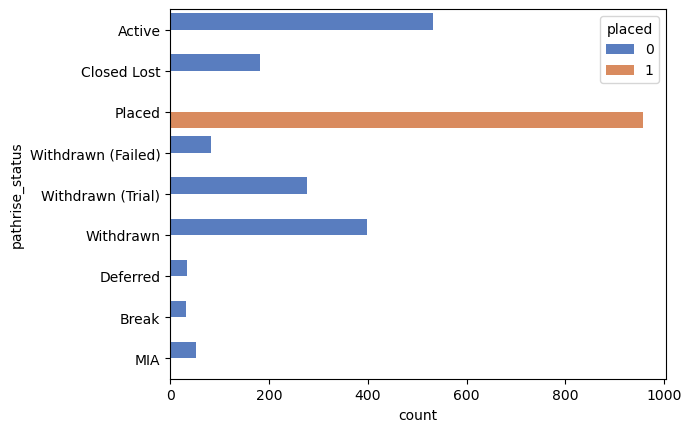

In [22]:
sns.countplot(data=df, y='pathrise_status', hue='placed', palette='muted')
plt.show()

In [23]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

In [24]:
df[(df['pathrise_status']=='Active') | (df['pathrise_status']=='Break')]['program_duration_days'].unique()

array([nan])

In [25]:
df[(df['pathrise_status']=='Active') | (df['pathrise_status']=='Break')]['placed'].unique()

array([0], dtype=int64)

In [26]:
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A', nan],
      dtype=object)

In [27]:
df['cohort_tag_month'] = df['cohort_tag'].str[:3]

In [28]:
df['cohort_tag_month'].unique()

array(['OCT', 'JAN', 'AUG', 'SEP', 'DEC', 'FEB', 'NOV', 'JUL', 'APR',
       'MAR', 'JUN', 'MAY', nan], dtype=object)

In [29]:
# extract fortnight symbol from cohort_tag
df['cohort_tag_fortnight'] = df['cohort_tag'].str[-1:]

In [30]:
df['cohort_tag_fortnight'].unique()

array(['A', 'B', 'C', 'a', nan], dtype=object)

In [31]:
df['cohort_tag_fortnight'] = df['cohort_tag_fortnight'].str.upper()

In [32]:
df['cohort_tag_fortnight'].unique()

array(['A', 'B', 'C', nan], dtype=object)

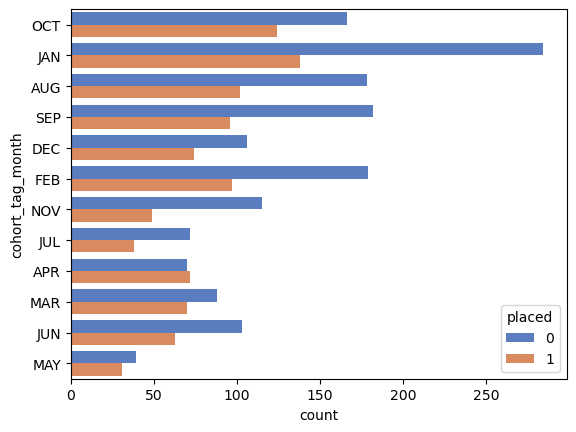

In [33]:
sns.countplot(data=df, y='cohort_tag_month', hue='placed', palette='muted')
plt.show()

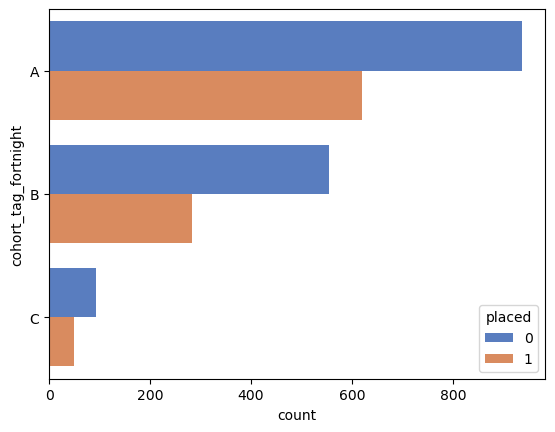

In [34]:
sns.countplot(data=df, y='cohort_tag_fortnight', hue='placed', palette='muted')
plt.show()

In [35]:
categorical_features=['primary_track',
        'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']

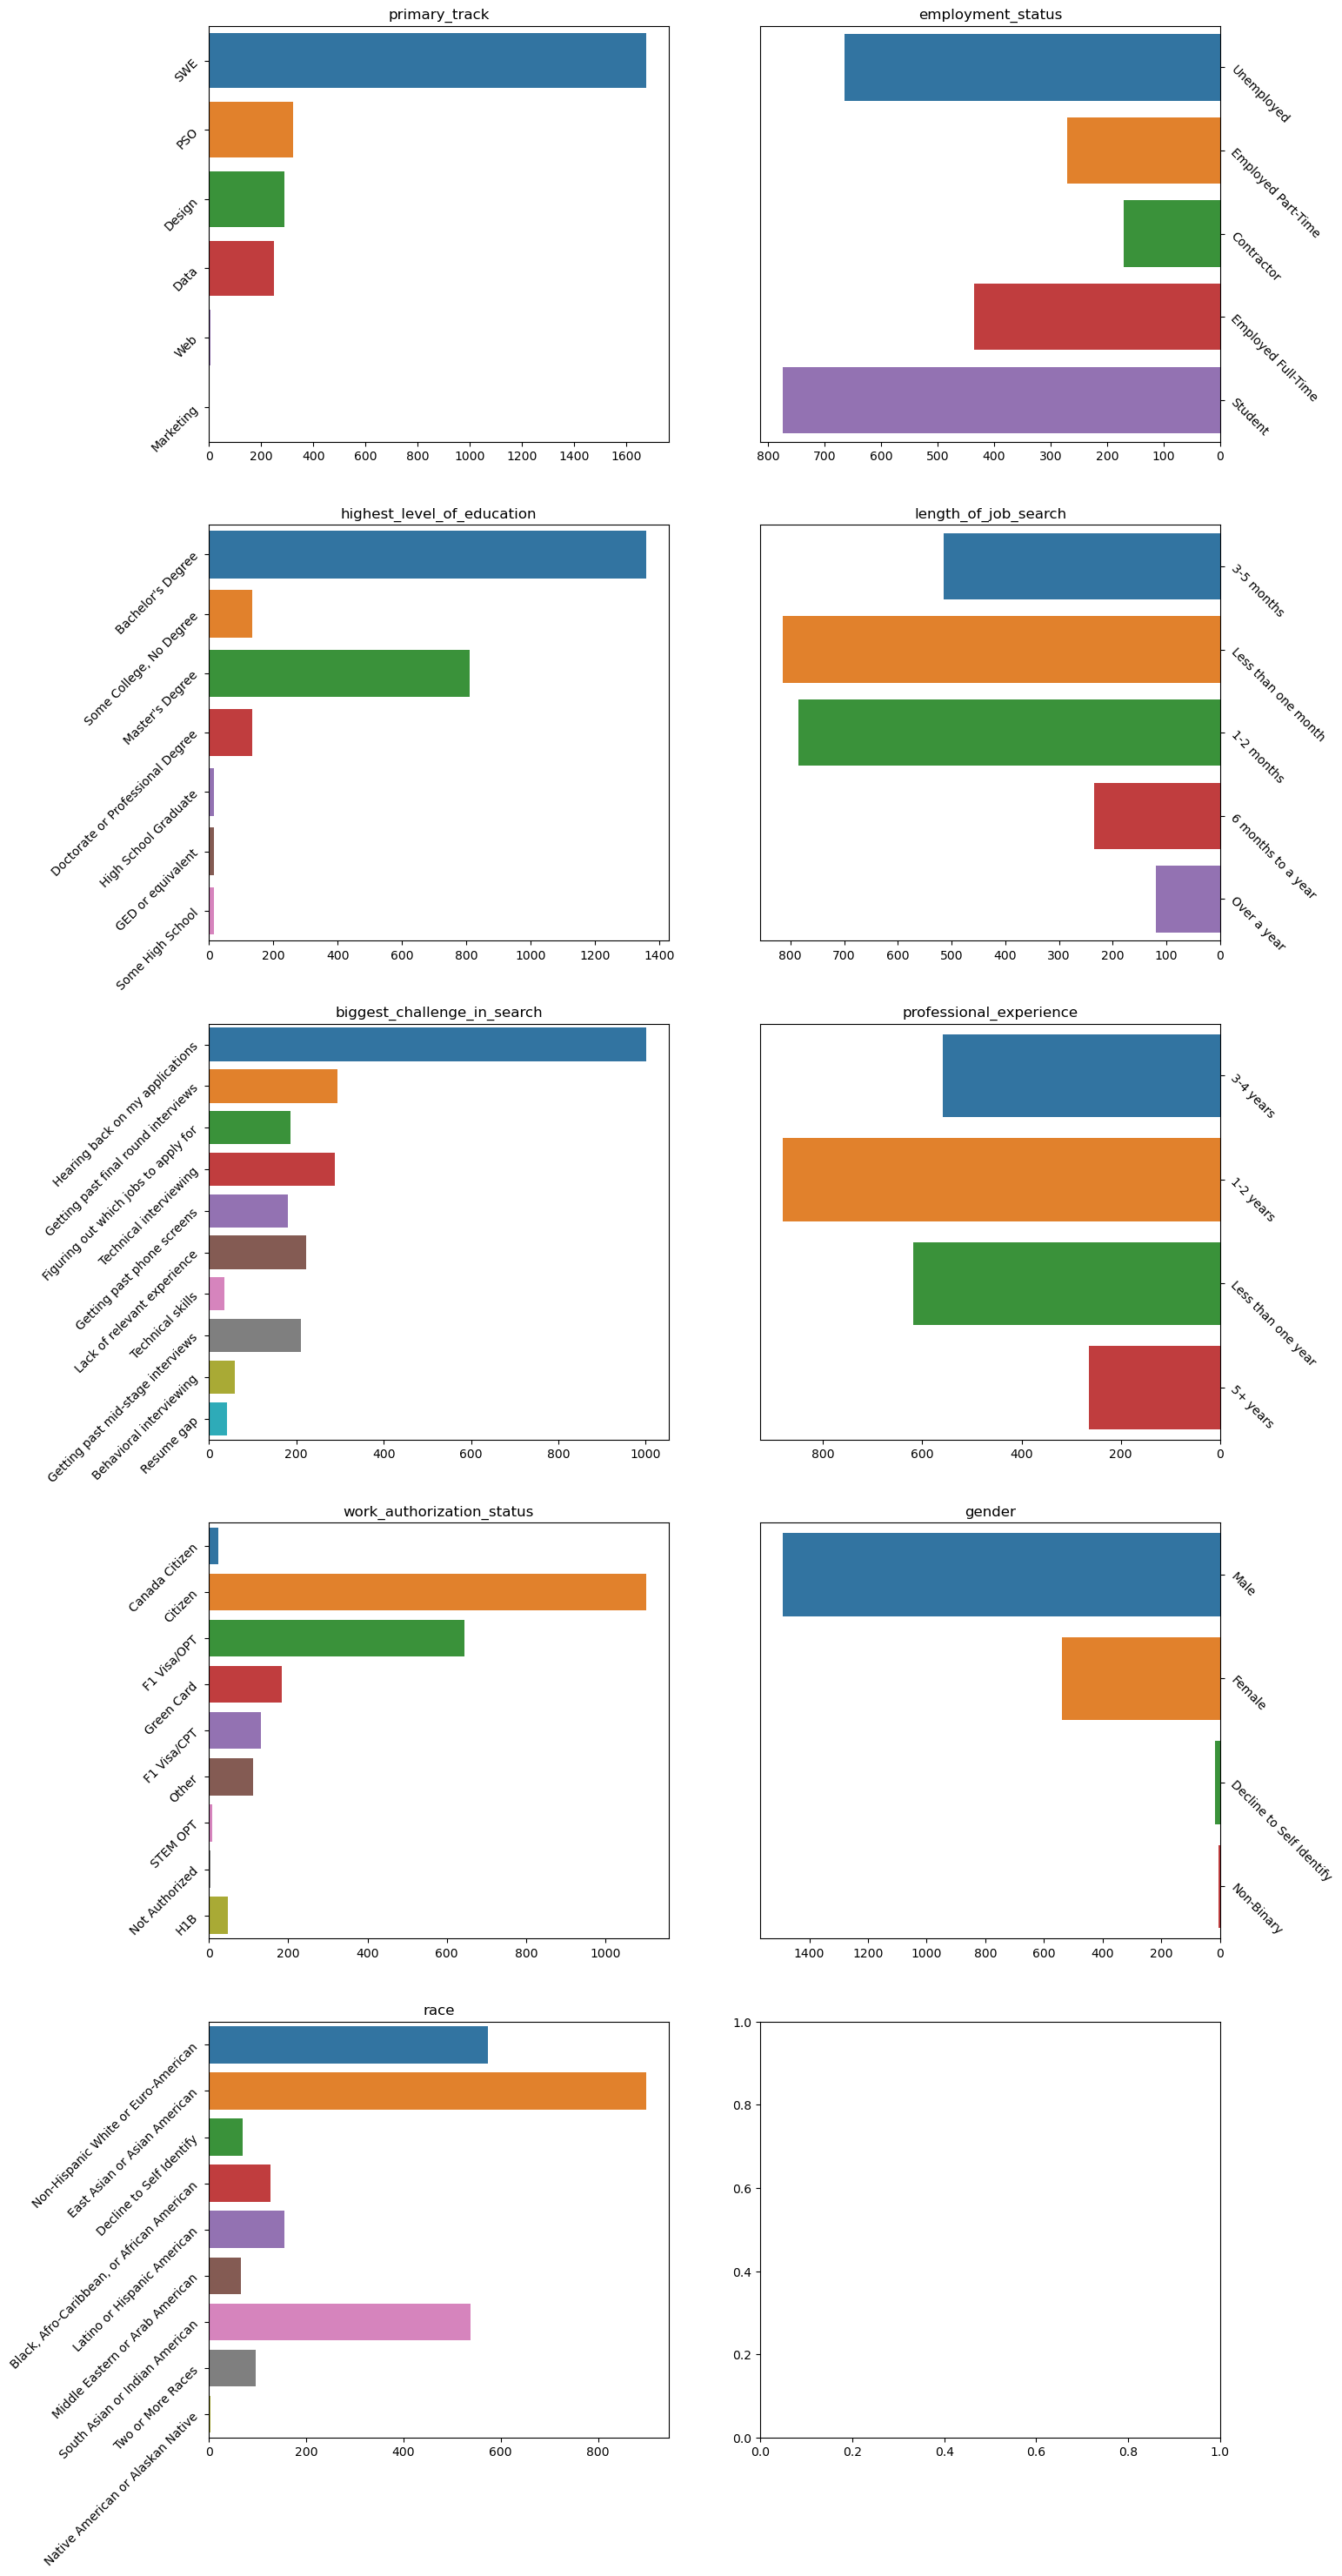

In [36]:
overview_categorical_features(data=df, features=categorical_features, target='placed')

In [37]:
numerical_features=['number_of_interviews',
       'number_of_applications']

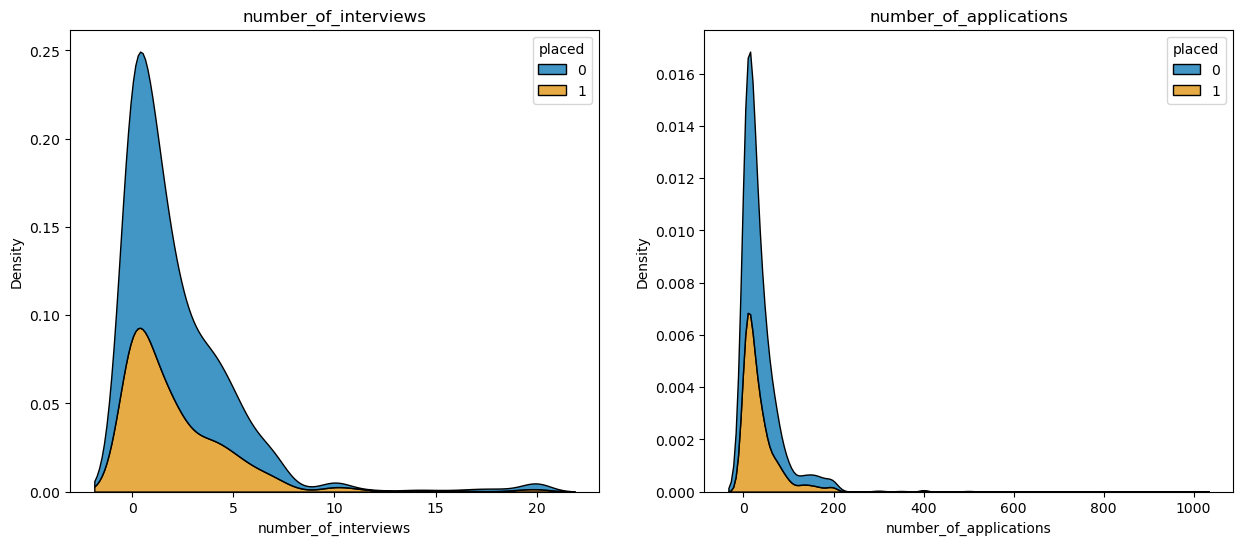

In [38]:
overview_numerical_features(data=df, features=numerical_features, target='placed')

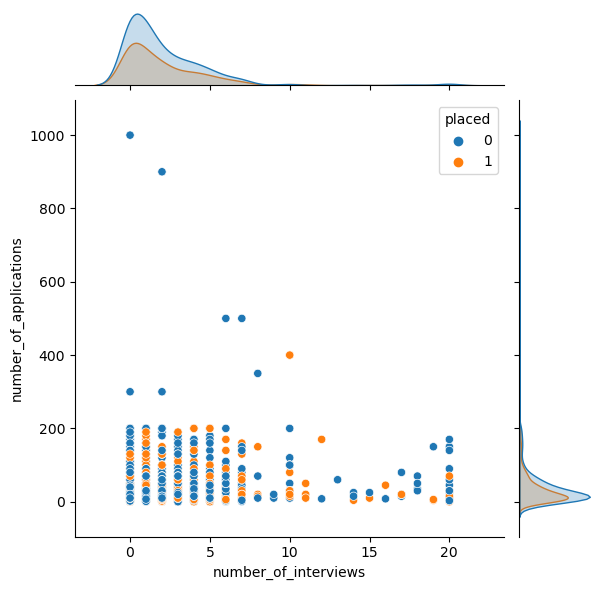

In [39]:
sns.jointplot(data=df, x='number_of_interviews', y='number_of_applications', hue='placed')
plt.show()

In [40]:
df=remove_outliers_z_score(data=df, feature='number_of_applications', threshold=3)

In [41]:
df=remove_outliers_z_score(data=df, feature='number_of_interviews', threshold=3)

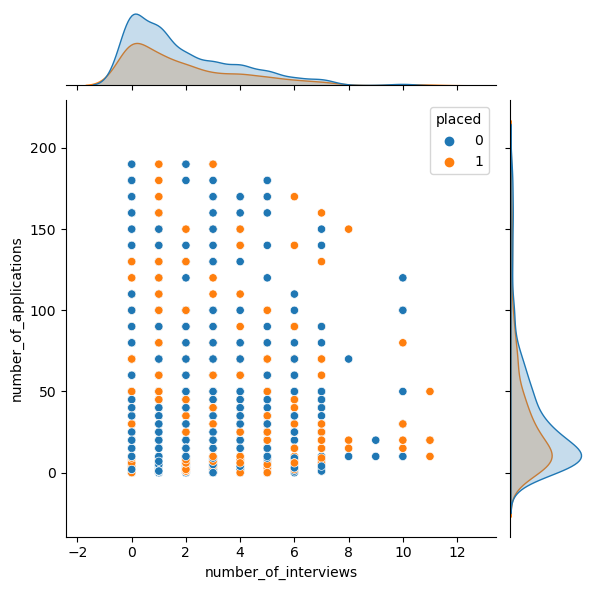

In [42]:
sns.jointplot(data=df, x='number_of_interviews', y='number_of_applications', hue='placed')
plt.show()

In [43]:
df['employment_status'].unique()

array(['Unemployed', 'Employed Part-Time', 'Contractor',
       'Employed Full-Time', 'Student', nan], dtype=object)

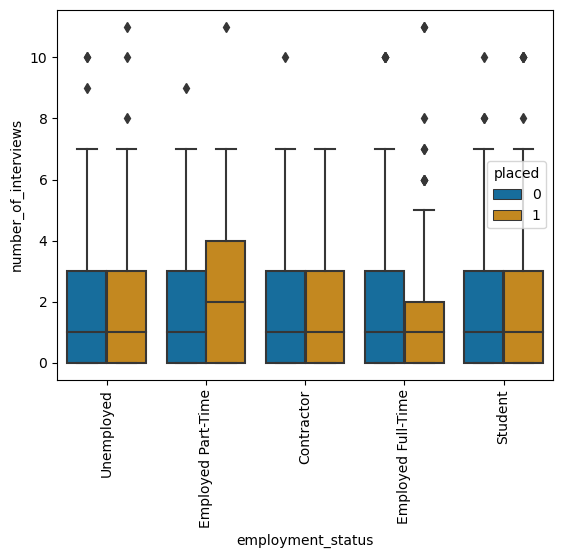

In [44]:
sns.boxplot(data=df, x='employment_status', y='number_of_interviews', hue='placed', palette='colorblind')
plt.xticks(rotation=90)
plt.show()

In [45]:
df['highest_level_of_education'].unique()

array(['Some College, No Degree', "Master's Degree", "Bachelor's Degree",
       nan, 'Doctorate or Professional Degree', 'High School Graduate',
       'GED or equivalent', 'Some High School'], dtype=object)

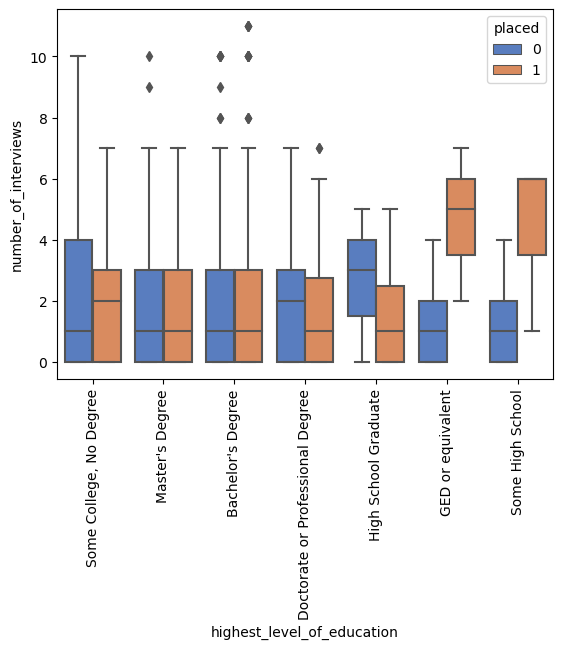

In [46]:
sns.boxplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed', palette='muted')
plt.xticks(rotation=90)
plt.show()

In [47]:
df['length_of_job_search'].unique()

array(['3-5 months', 'Less than one month', '1-2 months',
       '6 months to a year', nan, 'Over a year'], dtype=object)

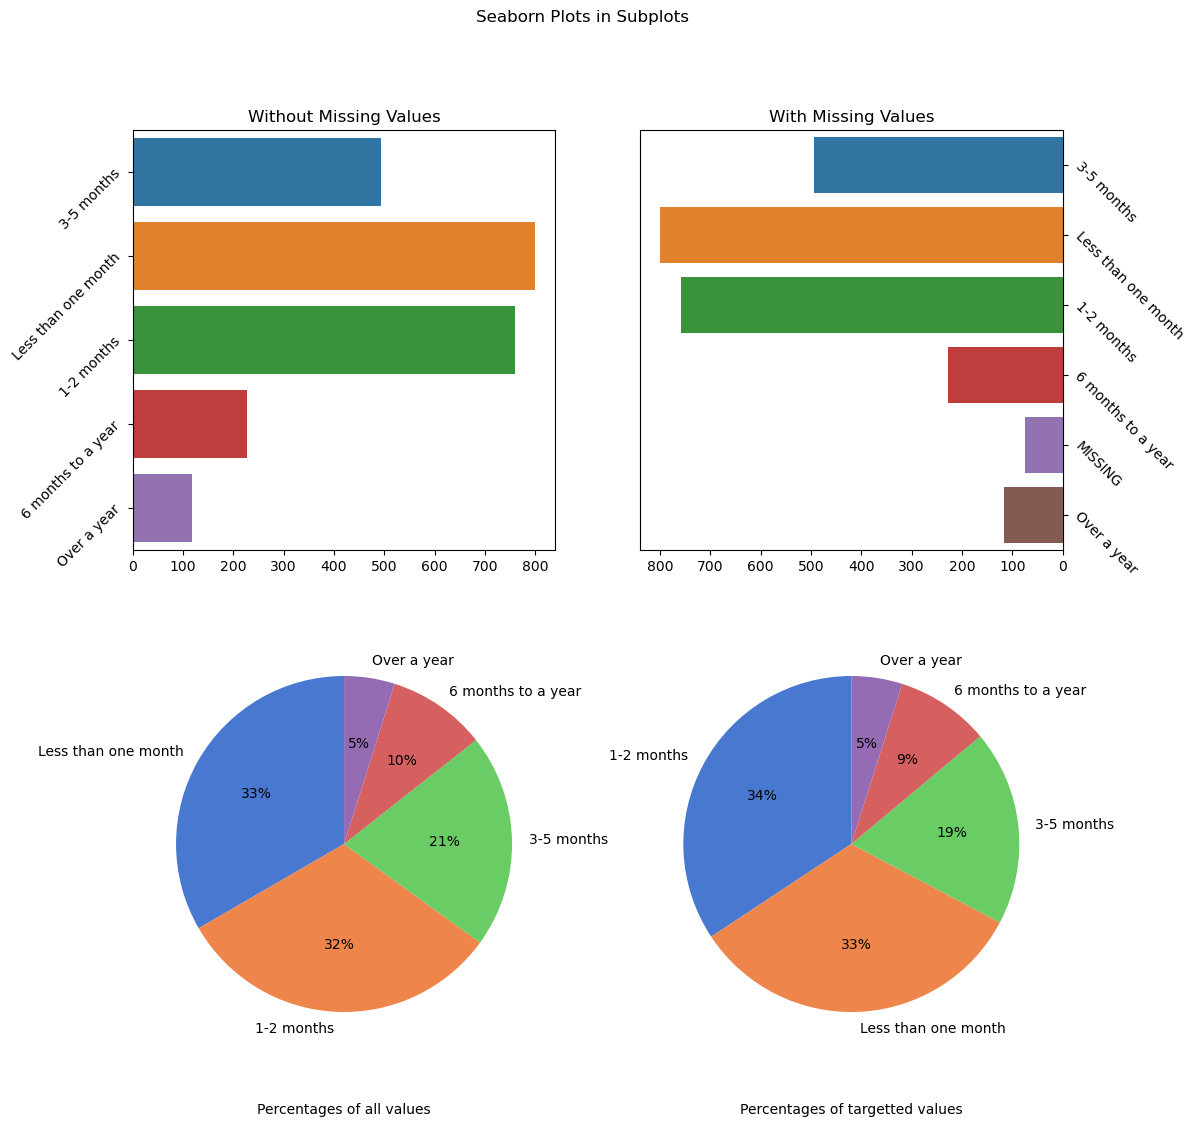

In [48]:
overview_categorical_feature_full(data=df, feature='length_of_job_search', target='placed')

In [49]:
df['biggest_challenge_in_search'].unique()

array(['Getting past final round interviews',
       'Figuring out which jobs to apply for',
       'Hearing back on my applications', 'Technical interviewing',
       'Getting past phone screens', 'Lack of relevant experience',
       'Technical skills', 'Getting past mid-stage interviews',
       'Behavioral interviewing', 'Resume gap', nan], dtype=object)

In [50]:
df['professional_experience'].unique()

array(['1-2 years', 'Less than one year', '3-4 years', '5+ years', nan],
      dtype=object)

In [51]:
df['work_authorization_status'].unique()

array(['Citizen', 'F1 Visa/OPT', 'Green Card', 'F1 Visa/CPT', 'Other',
       nan, 'STEM OPT', 'Not Authorized', 'Canada Citizen', 'H1B'],
      dtype=object)

<AxesSubplot:xlabel='number_of_interviews', ylabel='Density'>

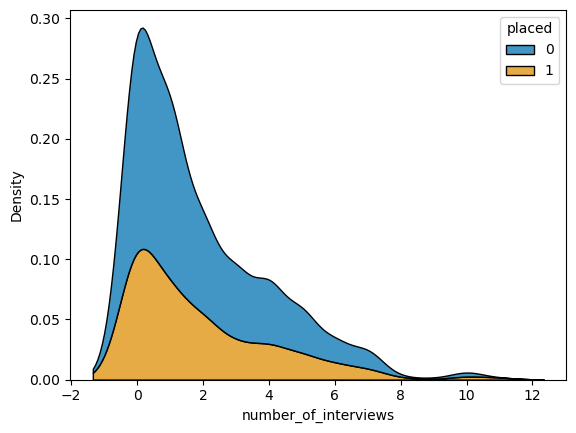

In [52]:
sns.kdeplot(data=df, x='number_of_interviews', hue='placed', multiple='stack', palette='colorblind')

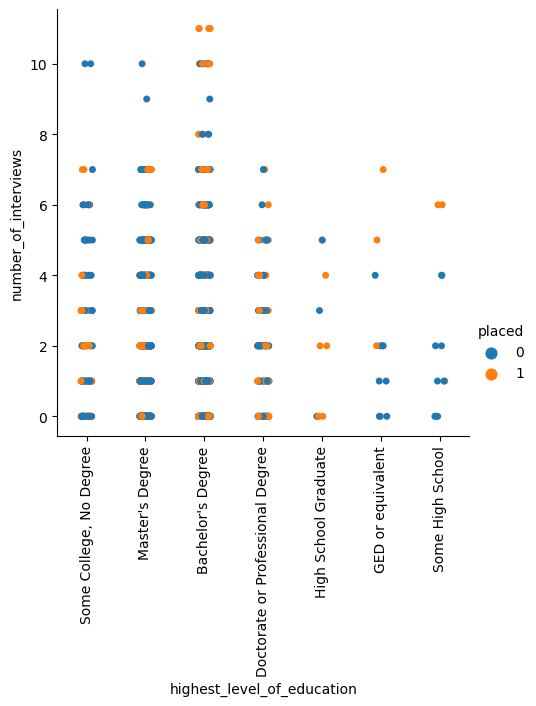

In [53]:
sns.catplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

In [54]:
df.head(10)

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month,cohort_tag_fortnight
0,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American,JAN,A
1,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG,B
2,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG,B
3,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG,A
4,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,AUG,A
5,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",AUG,B
6,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American,AUG,A
7,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American,AUG,B
8,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American",SEP,A
9,Closed Lost,PSO,AUG19B,0.0,0,Unemployed,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Other,0.0,3,Male,Latino or Hispanic American,AUG,B


In [55]:
analyze_missing_values(df=df)

,Total,%
program_duration_days,598,24.2
gender,478,19.3
work_authorization_status,282,11.4
employment_status,226,9.1
professional_experience,216,8.7
number_of_interviews,214,8.7
length_of_job_search,74,3.0
highest_level_of_education,55,2.2
biggest_challenge_in_search,22,0.9
race,17,0.7


In [56]:
df[~df['program_duration_days'].notnull()]['pathrise_status'].value_counts()

Active    519
MIA        49
Break      30
Name: pathrise_status, dtype: int64

In [57]:
df['gender'].value_counts()

Male                        1448
Female                       525
Decline to Self Identify      15
Non-Binary                     6
Name: gender, dtype: int64

In [58]:
df['gender'] = df['gender'].fillna('Decline to Self Identify')

In [59]:
df['gender'].value_counts()

Male                        1448
Female                       525
Decline to Self Identify     493
Non-Binary                     6
Name: gender, dtype: int64

In [60]:
df['work_authorization_status'].fillna('missed').value_counts()

Citizen           1067
F1 Visa/OPT        622
missed             282
Green Card         177
F1 Visa/CPT        131
Other              112
H1B                 47
Canada Citizen      22
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [61]:
df[df['work_authorization_status'].isnull()]['employment_status'].value_counts()

Student               90
Unemployed            77
Employed Full-Time    44
Employed Part-Time    28
Contractor            16
Name: employment_status, dtype: int64

In [62]:
employment_status_list=['Employed Full-Time', 'Employed Part-Time', 'Contractor']

filtered = df['work_authorization_status'].isnull() & df['employment_status'].isin(employment_status_list)
    
df.loc[filtered,'work_authorization_status']=df.loc[filtered,'work_authorization_status'].fillna('Autorized')

In [63]:
df['work_authorization_status'].fillna('missed', inplace=True)

In [64]:
df['work_authorization_status'].fillna('*****').value_counts()

Citizen           1067
F1 Visa/OPT        622
missed             194
Green Card         177
F1 Visa/CPT        131
Other              112
Autorized           88
H1B                 47
Canada Citizen      22
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [65]:
df['employment_status'].value_counts()

Student               755
Unemployed            637
Employed Full-Time    426
Employed Part-Time    261
Contractor            167
Name: employment_status, dtype: int64

In [66]:
df['employment_status'].fillna('Missed', inplace=True)

In [67]:
df['employment_status'].value_counts()

Student               755
Unemployed            637
Employed Full-Time    426
Employed Part-Time    261
Missed                226
Contractor            167
Name: employment_status, dtype: int64

In [68]:
df['professional_experience'].fillna('Missed').value_counts()

1-2 years             855
Less than one year    601
3-4 years             549
5+ years              251
Missed                216
Name: professional_experience, dtype: int64

In [69]:
df['professional_experience'].fillna('Missed', inplace=True)

In [70]:
df['number_of_interviews'].describe()

count    2258.000000
mean        1.895926
std         2.099491
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: number_of_interviews, dtype: float64

In [71]:
df['number_of_interviews'].fillna(-1).value_counts()

 0.0     750
 1.0     519
 2.0     302
-1.0     214
 3.0     203
 4.0     190
 5.0     134
 6.0      74
 7.0      59
 10.0     16
 8.0       5
 11.0      4
 9.0       2
Name: number_of_interviews, dtype: int64

In [72]:
df['number_of_interviews'].fillna(df['number_of_interviews'].mean(), inplace=True)

In [73]:
df['length_of_job_search'].value_counts()

Less than one month    800
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
Name: length_of_job_search, dtype: int64

In [74]:
df['length_of_job_search'].fillna('missed').value_counts()

Less than one month    800
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
missed                  74
Name: length_of_job_search, dtype: int64

In [75]:
df['length_of_job_search'].fillna('Less than one month', inplace=True)

In [76]:
df['length_of_job_search'].fillna('missed').value_counts()

Less than one month    874
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
Name: length_of_job_search, dtype: int64

In [77]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: highest_level_of_education, dtype: int64

In [78]:
df['highest_level_of_education'].fillna('missed').value_counts()

Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
missed                                55
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: highest_level_of_education, dtype: int64

In [79]:
df['highest_level_of_education'].fillna('missed', inplace=True)

In [80]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
missed                                55
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: highest_level_of_education, dtype: int64

In [81]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         968
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
Name: biggest_challenge_in_search, dtype: int64

In [82]:
df['biggest_challenge_in_search'].fillna('missed').value_counts()

Hearing back on my applications         968
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
missed                                   22
Name: biggest_challenge_in_search, dtype: int64

In [83]:
df['biggest_challenge_in_search'].fillna('Hearing back on my applications', inplace=True)

In [84]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         990
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
Name: biggest_challenge_in_search, dtype: int64

In [85]:
df['race'].fillna('missed').value_counts()

East Asian or Asian American                  866
Non-Hispanic White or Euro-American           563
South Asian or Indian American                525
Latino or Hispanic American                   151
Black, Afro-Caribbean, or African American    121
Two or More Races                              94
Decline to Self Identify                       66
Middle Eastern or Arab American                66
missed                                         17
Native American or Alaskan Native               3
Name: race, dtype: int64

In [86]:
df['race'].fillna('Decline to Self Identify', inplace=True)

In [87]:
df['race'].value_counts()

East Asian or Asian American                  866
Non-Hispanic White or Euro-American           563
South Asian or Indian American                525
Latino or Hispanic American                   151
Black, Afro-Caribbean, or African American    121
Two or More Races                              94
Decline to Self Identify                       83
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

In [88]:
df['cohort_tag_month'].fillna('missed').value_counts()

JAN       419
OCT       280
FEB       271
SEP       269
AUG       258
DEC       174
NOV       162
JUN       159
MAR       158
APR       139
JUL       106
MAY        69
missed      8
Name: cohort_tag_month, dtype: int64

In [89]:
df['cohort_tag_month'].fillna('FEB', inplace=True)

In [90]:
df['cohort_tag_month'].value_counts()

JAN    419
OCT    280
FEB    279
SEP    269
AUG    258
DEC    174
NOV    162
JUN    159
MAR    158
APR    139
JUL    106
MAY     69
Name: cohort_tag_month, dtype: int64

In [91]:
df['cohort_tag_fortnight'].fillna('missed').value_counts()

A         1519
B          812
C          133
missed       8
Name: cohort_tag_fortnight, dtype: int64

In [92]:
df['cohort_tag_fortnight'].fillna('B', inplace=True)

In [93]:
df['cohort_tag_fortnight'].value_counts()

A    1519
B     820
C     133
Name: cohort_tag_fortnight, dtype: int64

In [94]:
analyze_missing_values(df=df)

,Total,%
program_duration_days,598,24.2
cohort_tag,8,0.3
pathrise_status,0,0.0
work_authorization_status,0,0.0
cohort_tag_month,0,0.0
race,0,0.0
gender,0,0.0
number_of_applications,0,0.0
number_of_interviews,0,0.0
biggest_challenge_in_search,0,0.0


In [95]:
# remove rows with pathrise_status as 'Active'
df.drop(df[df['pathrise_status']=='Active'].index, axis=0, inplace=True)

In [96]:
df['pathrise_status'].unique()

array(['Closed Lost', 'Placed', 'Withdrawn (Failed)', 'Withdrawn (Trial)',
       'Withdrawn', 'Deferred', 'Break', 'MIA'], dtype=object)

In [97]:
df.shape

(1953, 17)

In [98]:
df[df['program_duration_days'].isnull()].groupby(['pathrise_status']).describe()

program_duration_days                              placed  \
                                count mean std min 25% 50% 75% max  count   
pathrise_status                                                             
Break                             0.0  NaN NaN NaN NaN NaN NaN NaN   30.0   
MIA                               0.0  NaN NaN NaN NaN NaN NaN NaN   49.0   

                                                   number_of_interviews  \
                mean  std  min  25%  50%  75%  max                count   
pathrise_status                                                           
Break            0.0  0.0  0.0  0.0  0.0  0.0  0.0                 30.0   
MIA              0.0  0.0  0.0  0.0  0.0  0.0  0.0                 49.0   

                                                                    \
                     mean       std  min  25%       50%   75%  max   
pathrise_status                                                      
Break            1.856259  1.851492  0.0  0.0  1.447963  2.75  6.0   
MIA              1.477052  1.411742  0.0  0.0  1.000000  2.00  5.0   

                number_of_applications                                        \
                                 count       mean        std  min  25%   50%   
pathrise_status                                                                
Break                             30.0  20.500000  19.381381  0.0  6.0  15.0   
MIA                               49.0  34.244898  38.661744  0.0  9.0  25.0   

                               
                   75%    max  
pathrise_status                
Break            28.75   80.0  
MIA              45.00  190.0

In [99]:
filtered = df['pathrise_status']=='MIA'
    
df.loc[filtered,'program_duration_days']=df.loc[filtered,'program_duration_days'].fillna(0)

In [100]:
filtered = df['pathrise_status']=='Break'
    
df.loc[filtered,'program_duration_days']=df.loc[filtered,'program_duration_days'].fillna(0)

In [101]:
df.drop(columns=['pathrise_status', 'cohort_tag'], axis=1, inplace=True)

In [102]:
analyze_missing_values(df=df)

,Total,%
primary_track,0,0.0
program_duration_days,0,0.0
placed,0,0.0
employment_status,0,0.0
highest_level_of_education,0,0.0
length_of_job_search,0,0.0
biggest_challenge_in_search,0,0.0
professional_experience,0,0.0
work_authorization_status,0,0.0
number_of_interviews,0,0.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 1 to 2471
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1953 non-null   object 
 1   program_duration_days        1953 non-null   float64
 2   placed                       1953 non-null   int64  
 3   employment_status            1953 non-null   object 
 4   highest_level_of_education   1953 non-null   object 
 5   length_of_job_search         1953 non-null   object 
 6   biggest_challenge_in_search  1953 non-null   object 
 7   professional_experience      1953 non-null   object 
 8   work_authorization_status    1953 non-null   object 
 9   number_of_interviews         1953 non-null   float64
 10  number_of_applications       1953 non-null   int64  
 11  gender                       1953 non-null   object 
 12  race                         1953 non-null   object 
 13  cohort_tag_month  

In [104]:
categorical_features=['primary_track',
        'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race', 'cohort_tag_month', 'cohort_tag_fortnight']

In [105]:
transform_categories_to_numbers(data=df, features=categorical_features)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 1 to 2471
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1953 non-null   int32  
 1   program_duration_days        1953 non-null   float64
 2   placed                       1953 non-null   int64  
 3   employment_status            1953 non-null   int32  
 4   highest_level_of_education   1953 non-null   int32  
 5   length_of_job_search         1953 non-null   int32  
 6   biggest_challenge_in_search  1953 non-null   int32  
 7   professional_experience      1953 non-null   int32  
 8   work_authorization_status    1953 non-null   int32  
 9   number_of_interviews         1953 non-null   float64
 10  number_of_applications       1953 non-null   int64  
 11  gender                       1953 non-null   int32  
 12  race                         1953 non-null   int32  
 13  cohort_tag_month  

In [107]:
numerical_features=['number_of_interviews',
       'number_of_applications']

In [108]:
transform_numbers_scaler(data=df, features=numerical_features)

In [109]:
df.describe()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month,cohort_tag_fortnight
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1.953000e+03,1.953000e+03,1953.000000,1953.000000,1953.000000,1953.000000
mean,3.194572,132.012289,0.478751,3.160778,1.814132,1.626728,4.537122,1.517665,3.739887,1.893575e-16,-9.095529e-18,1.388633,4.197133,5.543779,0.442396
std,1.380125,126.381440,0.499676,1.654216,2.135705,1.362346,2.093310,1.381160,2.506126,1.000256e+00,1.000256e+00,0.797675,2.429656,3.574765,0.594446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.344726e-01,-9.100023e-01,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000,-9.344726e-01,-6.603401e-01,1.000000,2.000000,3.000000,0.000000
50%,4.000000,107.000000,0.000000,4.000000,0.000000,1.000000,5.000000,1.000000,3.000000,-4.477311e-01,-3.551973e-01,2.000000,4.000000,5.000000,0.000000
75%,4.000000,221.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,4.000000,5.257519e-01,3.383089e-01,2.000000,7.000000,9.000000,1.000000
max,5.000000,548.000000,1.000000,5.000000,7.000000,4.000000,9.000000,4.000000,10.000000,4.419684e+00,4.360645e+00,3.000000,8.000000,11.000000,2.000000


In [110]:
df.to_csv('Pathrise_preprocessed.csv', index=False)

In [111]:
df.drop('program_duration_days', axis=1, inplace=True)

In [112]:
X=df.drop('placed', axis=1)
y=df['placed']

# check for Imbalancment
y.value_counts()

0    1018
1     935
Name: placed, dtype: int64

In [113]:
# seems OK so Split Dataset to Test and Train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [114]:
df_results=pd.DataFrame()

In [115]:
def Model_logistic(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        log = LogisticRegression()

        log_cv = GridSearchCV(log, hp, cv=10)
        
        log_cv.fit(X_train, y_train)
        
        predictions = log_cv.predict(X_test)
        
        hp = log_cv.best_params_
        
    else:
        log = LogisticRegression(**hp)

        log.fit(X_train, y_train)

        predictions = log.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    dic = {'model': 'Logistic', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cm, dic

In [116]:
hp = {'random_state':101}

cm, dic = Model_logistic(X_train, y_train, X_test, y_test, hp)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [117]:
lr_check_hp = {  'C':[0.01,0.1,1],
                 'penalty':['l2'],
                 'solver':['lbfgs'],
                 'random_state':[101]
              }

In [118]:
cm, dic = Model_logistic(X_train, y_train, X_test, y_test, lr_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [119]:
def Model_knn(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        knn = KNeighborsClassifier()

        knn_cv = GridSearchCV(knn, hp, cv=10)
        
        knn_cv.fit(X_train, y_train)
        
        predictions = knn_cv.predict(X_test)
        
        hp = knn_cv.best_params_
        
    else:
    
        knn = KNeighborsClassifier(**hp)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'KNN', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, cm, dic

In [120]:
hp = {}

cr_knn, cm_knn, dic = Model_knn(X_train, y_train, X_test, y_test, hp, False)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [121]:
knn_check_hp = {  'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]
              }

In [122]:
cr_knn, cm_knn, dic = Model_knn(X_train, y_train, X_test, y_test, knn_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [123]:
def decision_tree(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        tree = DecisionTreeClassifier()

        tree_cv = GridSearchCV(tree, hp, cv=10)
        
        tree_cv.fit(X_train, y_train)
        
        predictions = tree_cv.predict(X_test)
        
        hp = tree_cv.best_params_
        
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        
    else:
    
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Decision Tree', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return tree, cr, importances, cm, dic

In [124]:
hp = {'random_state':101}
dt_tree, cr_dt, importances_dt, cm_dt, dic = decision_tree(X_train, y_train, X_test, y_test, hp, False)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [125]:
dt_check_hp = {  'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [2*n for n in range(1,10)],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'random_state':[101]
              }

In [126]:
dt_tree, cr_dt, importances_dt, cm_dt, dic = decision_tree(X_train, y_train, X_test, y_test, dt_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [127]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.547315,0.505682,0.501408,"{""random_state"": 101}"
1,Logistic,0.547315,0.505682,0.501408,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101, ""solver"": ""lbfgs""}"
2,KNN,0.514066,0.471795,0.491979,{}
3,KNN,0.493606,0.445714,0.440678,"{""algorithm"": ""ball_tree"", ""n_neighbors"": 9, ""p"": 1}"
4,Decision Tree,0.485934,0.436782,0.430595,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_features"": ""auto"", ""min_samples_leaf"": 2, ""min_samples_split"": 5, ""random_state"": 101, ""splitter"": ""random""}"


In [128]:
def Model_random_forest(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        rfc = RandomForestClassifier()

        rfc_cv = GridSearchCV(rfc, hp, cv=10)
        
        rfc_cv.fit(X_train, y_train)
        
        predictions = rfc_cv.predict(X_test)
        
        hp = rfc_cv.best_params_
        
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    else:
    
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Random Forest', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, importances, cm, dic

In [129]:
hp = {'random_state': 101}
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(X_train, y_train, X_test, y_test, hp, False)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [130]:
rf_check_hp = {'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [20, 40, 60, 80, 90], 
               'random_state': [101]}

In [131]:
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(X_train, y_train, X_test, y_test, rf_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [132]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.547315,0.505682,0.501408,"{""random_state"": 101}"
1,Logistic,0.547315,0.505682,0.501408,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101, ""solver"": ""lbfgs""}"
2,KNN,0.514066,0.471795,0.491979,{}
3,KNN,0.493606,0.445714,0.440678,"{""algorithm"": ""ball_tree"", ""n_neighbors"": 9, ""p"": 1}"
4,Decision Tree,0.485934,0.436782,0.430595,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_features"": ""auto"", ""min_samples_leaf"": 2, ""min_samples_split"": 5, ""random_state"": 101, ""splitter"": ""random""}"
6,Random Forest,0.560102,0.520468,0.508571,"{""random_state"": 101}"
7,Random Forest,0.547315,0.505618,0.504202,"{""min_samples_leaf"": 1, ""min_samples_split"": 5, ""n_estimators"": 80, ""random_state"": 101}"


In [133]:
hp = {"min_samples_leaf": 1, "min_samples_split": 5, "n_estimators": 80, "random_state": 101}
columns_to_remove=['biggest_challenge_in_search', 'number_of_applications', 'cohort_tag_month', 
                    'work_authorization_status', 'number_of_interviews', 'cohort_tag_fortnight', 
                    'race', 'length_of_job_search', 'gender', 'employment_status']
for column in columns_to_remove:
    new_X_train = X_train.drop([column], axis=1)
    new_X_test = X_test.drop([column], axis=1)
    cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
    dic['hp'] = 'Removed {}'.format(column)
    df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [134]:
hp = {"min_samples_leaf": 1, "min_samples_split": 5, "n_estimators": 80, "random_state": 101}
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [135]:
hp = {"random_state": 101}
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [136]:
rf_check_hp = {'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [20, 40, 60, 80, 90], 
               'random_state': [101]}

In [137]:
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)

cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, rf_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [138]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.547315,0.505682,0.501408,"{""random_state"": 101}"
1,Logistic,0.547315,0.505682,0.501408,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101, ""solver"": ""lbfgs""}"
2,KNN,0.514066,0.471795,0.491979,{}
3,KNN,0.493606,0.445714,0.440678,"{""algorithm"": ""ball_tree"", ""n_neighbors"": 9, ""p"": 1}"
4,Decision Tree,0.485934,0.436782,0.430595,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_features"": ""auto"", ""min_samples_leaf"": 2, ""min_samples_split"": 5, ""random_state"": 101, ""splitter"": ""random""}"
6,Random Forest,0.560102,0.520468,0.508571,"{""random_state"": 101}"
7,Random Forest,0.547315,0.505618,0.504202,"{""min_samples_leaf"": 1, ""min_samples_split"": 5, ""n_estimators"": 80, ""random_state"": 101}"
8,Random Forest,0.575448,0.539877,0.514620,Removed biggest_challenge_in_search
9,Random Forest,0.554987,0.514970,0.497110,Removed number_of_applications


In [139]:
'biggest_challenge_in_search', 'number_of_applications', 'cohort_tag_month', 
'work_authorization_status', 'number_of_interviews', 'cohort_tag_fortnight', 
'race', 'length_of_job_search', 'gender', 'employment_status'

('race', 'length_of_job_search', 'gender', 'employment_status')

In [140]:
importances_dt.sort_values('importance', ascending=False)

,feature,importance
0,primary_track,0.210
5,professional_experience,0.131
2,highest_level_of_education,0.114
1,employment_status,0.088
9,gender,0.087
3,length_of_job_search,0.084
10,race,0.075
12,cohort_tag_fortnight,0.071
7,number_of_interviews,0.046
6,work_authorization_status,0.036
